<a href="https://colab.research.google.com/github/Kishoremagesh/tnsdc/blob/main/naanmudhalvan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset
wine_data = pd.read_csv('/content/wine.csv')

# Splitting features and target variable
X = wine_data.drop('Hue', axis=1)
y = wine_data['Hue']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Building the ANN model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')
])

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
model.fit(X_train, y_train, batch_size=32, epochs=100, verbose=1)

# Predicting the Test set results
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Epoch 1/100
5/5 [==============================] - 1s 3ms/step - loss: 0.4085
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 0.1341
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 0.1135
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0678
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0571
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0456
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0380
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0323
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0267
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0255
Epoch 11/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0233
Epoch 12/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0209
Epoch 13/100
5/5 [==============================] - 0s 2ms/st

Epoch 1/100
4/4 [==============================] - 0s 95ms/step - loss: 6.3498e-04 - val_loss: 8.6684e-04
Epoch 2/100
4/4 [==============================] - 0s 17ms/step - loss: 5.9335e-04 - val_loss: 9.7043e-04
Epoch 3/100
4/4 [==============================] - 0s 34ms/step - loss: 5.5667e-04 - val_loss: 0.0011
Epoch 4/100
4/4 [==============================] - 0s 15ms/step - loss: 5.3067e-04 - val_loss: 0.0012
Epoch 5/100
4/4 [==============================] - 0s 20ms/step - loss: 4.8618e-04 - val_loss: 0.0012
Epoch 6/100
4/4 [==============================] - 0s 26ms/step - loss: 4.6934e-04 - val_loss: 0.0013
Epoch 7/100
4/4 [==============================] - 0s 20ms/step - loss: 4.3215e-04 - val_loss: 0.0015
Epoch 8/100
4/4 [==============================] - 0s 16ms/step - loss: 4.0687e-04 - val_loss: 0.0017
Epoch 9/100
4/4 [==============================] - 0s 21ms/step - loss: 3.9113e-04 - val_loss: 0.0016
Epoch 10/100
4/4 [==============================] - 0s 27ms/step - loss: 3

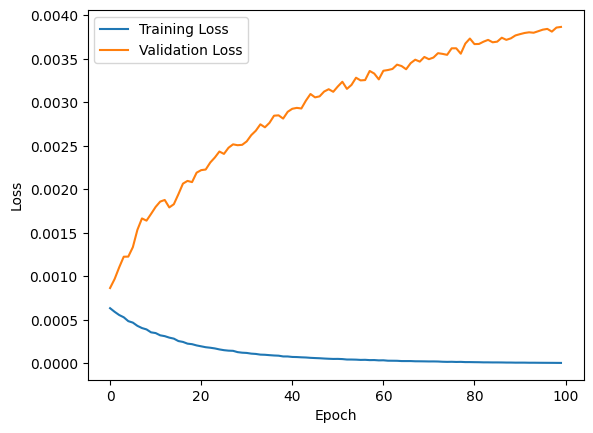

2/2 [==============================] - 0s 6ms/step


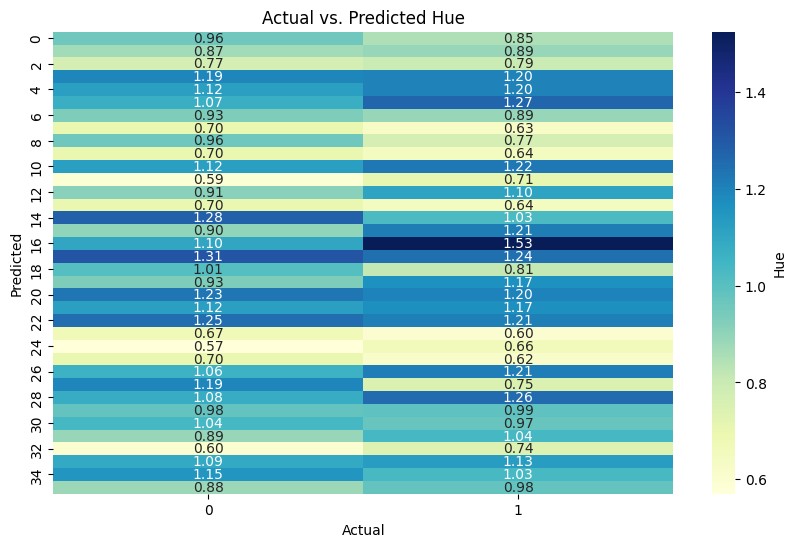

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Training the model
history = model.fit(X_train, y_train, batch_size=32, epochs=100, verbose=1, validation_split=0.2)

# Plot training history (loss)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Predicting the Test set results
y_pred = model.predict(X_test)

# Create a heatmap for model performance
plt.figure(figsize=(10, 6))
sns.heatmap(np.vstack([y_test.values, y_pred.flatten()]).T, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Hue'})
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Hue')
plt.show()
